# Are Fandango Movie Ratings Still Getting Inflated?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. Fandango later explained that the rounding disparity was a bug only found in the website.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

## Understanding the Data

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [3]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [4]:
# Below we isolate only the columns that provide information about Fandango to make the relevant data more readily available for later use. 
# We'll make copies to avoid any SettingWithCopyWarning later on.
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']]


In [5]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


The columns we've isolated are explained below:
- FILM/movie: Name of the movie in question.
- Fandango_Stars: The number of stars the movie had on its Fandango movie page after the rounding.
- Fandango_Ratingvalue: The number of stars the movie originally had before the rounding.
- Fandango_votes: Total amount of votes the movie had.
- Fandango_Difference: The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue.
- year: Release year of the movie.
- fandango: Fandango user rating of the movie.

### Sampling Data according to our needs:

Our current populations of interest are Fandango's ratings for popular movies released in 2015 and 2016. Hickey's data contains only the movies with at least 30 fan reviews on Fandango. We'll be using this value to determine whether the data from 2016 is representative of the corresponding population or not. To do this, we'll generate a random sample using a pseudorandom number generator and check their amounts of fan reviews to see if they are popular, and therefore, representative of the population.

In [7]:
after.sample(10, random_state=1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
206,Warcraft,2016,32,7.0,28,71,4.0,1.60,3.50,1.40,3.55,1.5,3.5,1.5,3.5
106,Max Steel,2016,22,4.6,0,38,3.5,1.10,2.30,0.00,1.90,1.0,2.5,0.0,2.0
107,Me Before You,2016,51,7.4,58,73,4.5,2.55,3.70,2.90,3.65,2.5,3.5,3.0,3.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
33,Cell,2016,38,4.3,11,16,3.0,1.90,2.15,0.55,0.80,2.0,2.0,0.5,1.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
152,Sully,2016,74,7.5,85,85,4.5,3.70,3.75,4.25,4.25,3.5,4.0,4.0,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5


Before moving forward let us read the README.md of both the original datasets to get a rough idea of the content in both dataset.
- Data from 'previous' contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.
- where as data from 'after' contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date.

In our next steps, we'll be isolating the movies by the years. As we've stated above, we'll only use movies released in 2015 and 2016.



In [8]:
# Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.
sum(fandango_previous['Fandango_votes'] < 30)

0

 There are movies with a release year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.
 

In [9]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [10]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [11]:
# Let's examine the frequency distribution for the Year column and then isolate the movies released in 2015.
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Let's isolate the 2016 movies in the other dateset:

In [13]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [14]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

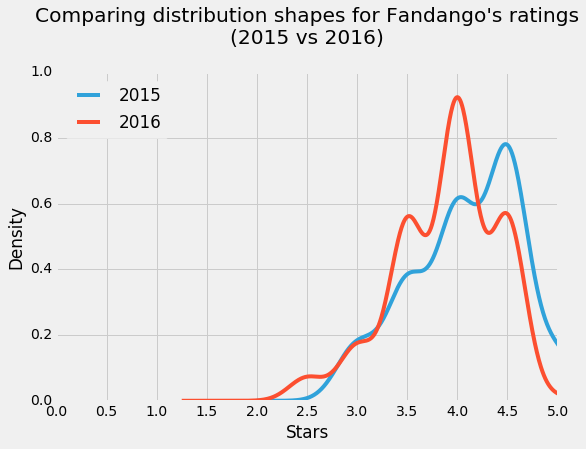

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies
We need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the datasets have different numbers of movies, we normalize the tables and show percentages instead.

In [17]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can now confirmed that the 4.5 to 5.0 reviews in 2016 are much lower than 2015. In fact, only less than one percent of the 2016 samples has rating of 5.0.

There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.


## Determining the Direction of the Change

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

Let's take a couple of summary metrics for more precise information about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions, and then we'll use a bar graph to plot the values.

In [20]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] 
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


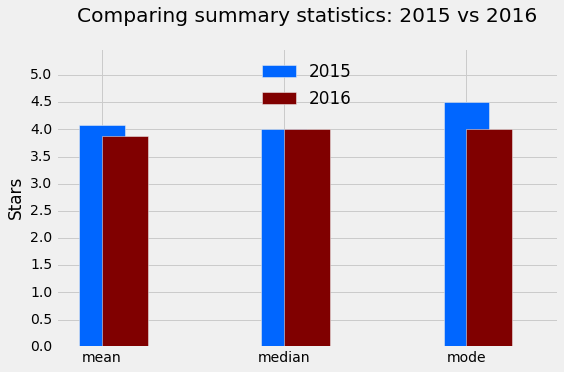

In [30]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#800000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. On average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.



## Conclusion
